# WEATHERPY PROJECT

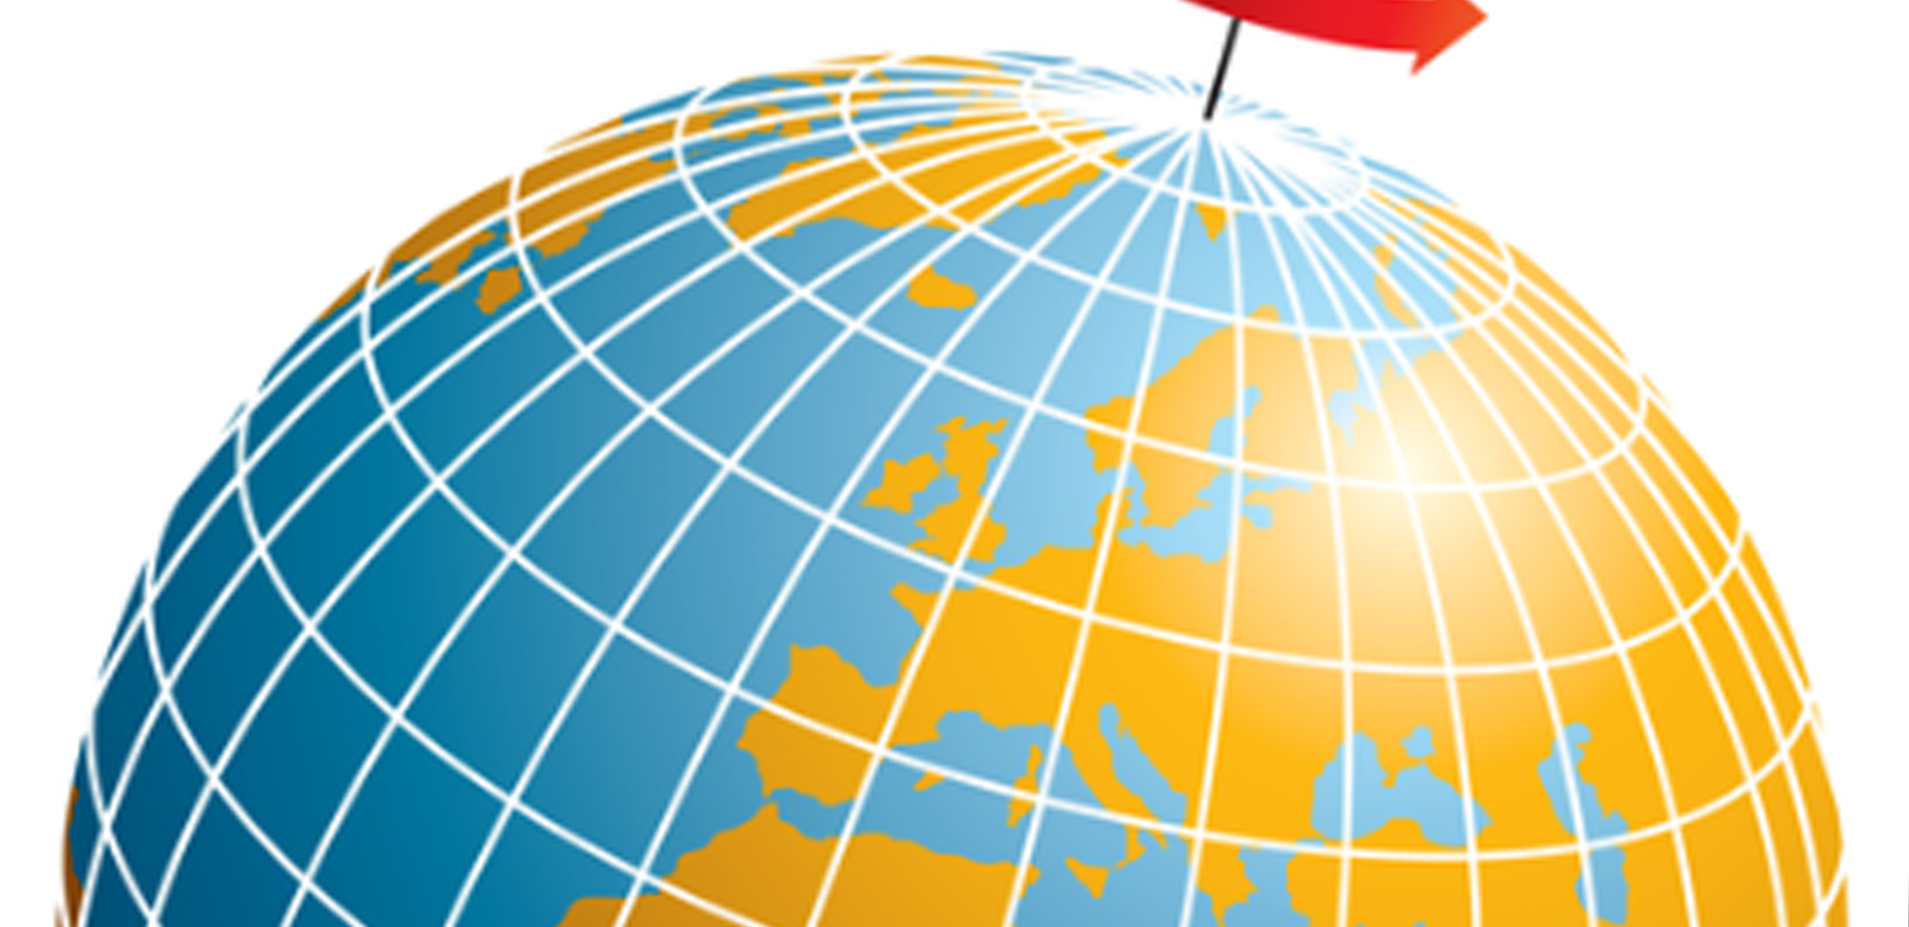

## Review the Geographic Coordinate System
We use the geographic coordinate system (GCS) to reference any point on Earth by its latitude and longitude coordinates.

<b>Latitudes</b> are imaginary lines on Earth that run parallel east to west and are measured in angular units called degrees, minutes, and seconds, with 60 minutes in a degree and 60 seconds in a minute. Sometimes a latitude is referred to as a parallel. Consider, for example, the embattled 38th parallel (38° north) in East Asia that roughly demarcates North Korea and South Korea.
The equator is an imaginary line around the middle of the earth that is equidistant from the North and South Poles and has a latitude of 0°. The equator splits Earth into Northern and Southern Hemispheres.
All latitude lines above the equator are measured northward and considered positive, after 0° (the equator) and up to 90°, or 90° north (the North Pole). All latitude lines below the equator are measured southward and considered negative, before 0° (the equator) and down to -90°, or 90° south (the South Pole).


<b>Longitudes</b> are imaginary lines on Earth that run from the North to the South Poles and are called meridians. The prime meridian represents zero meridian, the origin for longitude coordinates, and splits Earth into the Eastern and Western Hemispheres.
All meridians east of the prime meridian are considered positive, after 0° and up to 180°. All meridians west of the prime meridian are considered negative, before 0° and down to –180°.


All together, the lines of latitude (parallels) and longitude (meridians) make up a geographic grid, as if the Earth were wrapped in graph paper with intersecting horizontal and vertical lines mapping to specific locations.

GCS makes it possible to pinpoint any place on Earth by providing its precise address, which is the intersection of its latitude and longitude lines.


## Generate random latitudes and longitudes
Before we write the algorithm to generate the latitudes and longitudes, we need to refresh our memory of where people live in the world. Time for another quick geography lesson!
Earth's surface is covered by 70% water while the rest is covered by land. So, we can assume 70% of the latitude and longitude coordinates we generate are positioned over a body of water, whether an ocean, major lake (e.g., Lake Superior), or major river (e.g., Amazon). Geographic coordinates over a body of water may not be close to a city, especially if in the middle of an ocean.
Seven continental landmasses comprise 30% of Earth's surface. Some land is uninhabitable or sparsely populated due to extreme terrain and climes (e.g., Sahara, Siberia, the Himalayas, and areas of the western United States).
First consider the bodies of water. Start with at least 1,500 latitudes and longitudes, because 500 divided by 0.3 (30% land mass) equals 1,666 latitudes and longitudes.

We'll generate random latitudes and longitudes to ensure coordinates are fairly distributed around the world. An algorithm will pick random numbers between the low and high values for latitudes and longitudes. Also, the latitudes and longitudes must be floating-point decimal numbers, as each angular unit of degrees, minutes, and seconds can be represented by a decimal number. For example, Kailua-Kona, Hawaii has the angular coordinates 19° 38' 23.9784'' north and 155° 59' 48.9588'' west and can be written as a decimal number as follows: 19.639994, -155.996933.
To generate random numbers, we can use the Python random module. This module is part of the Python and Anaconda installation, so we don't need to install it. Let's test some random module functions to find one that can help us.

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

### Generate Random Cities

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [7]:
# Import the requests library.
import requests

weather_api_key = "892bd87a4f09841132e47e58d2e71da4"

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=892bd87a4f09841132e47e58d2e71da4


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=892bd87a4f09841132e47e58d2e71da4&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"base":"stations","main":{"temp":-9.35,"feels_like":-21.95,"temp_min":-12.33,"temp_max":-7.35,"pressure":1032,"humidity":39},"visibility":10000,"wind":{"speed":20.71,"deg":290,"gust":34.52},"clouds":{"all":20},"dt":1675510679,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1675511697,"sunset":1675548078},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': -9.35,
  'feels_like': -21.95,
  'temp_min': -12.33,
  'temp_max': -7.35,
  'pressure': 1032,
  'humidity': 39},
 'visibility': 10000,
 'wind': {'speed': 20.71, 'deg': 290, 'gust': 34.52},
 'clouds': {'all': 20},
 'dt': 1675510679,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1675511697,
  'sunset': 1675548078},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Get the JSON data.
boston_data = city_weather.json()

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 -7.35 39 20 20.71


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2023, 2, 4, 11, 37, 59)

In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

## Get the city weather Data
We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
- Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
- City, country, and date
- Latitude and longitude
- Maximum temperature
- Humidity
- Cloudiness
- Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sawakin
Processing Record 2 of Set 1 | palmas
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | caravelas
Processing Record 5 of Set 1 | santa isabel do rio negro
Processing Record 6 of Set 1 | hervey bay
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | challans
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | lakewood
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | lagoa
Processing Record 18 of Set 1 | bambanglipuro
Processing Record 19 of Set 1 | ust-kuyga
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | du

Processing Record 37 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 38 of Set 4 | srivardhan
Processing Record 39 of Set 4 | gao
Processing Record 40 of Set 4 | ancud
Processing Record 41 of Set 4 | cervo
Processing Record 42 of Set 4 | kyakhta
Processing Record 43 of Set 4 | nalhati
Processing Record 44 of Set 4 | tabira
Processing Record 45 of Set 4 | phangnga
Processing Record 46 of Set 4 | monte gordo
Processing Record 47 of Set 4 | cabo san lucas
Processing Record 48 of Set 4 | kattivakkam
Processing Record 49 of Set 4 | mount isa
Processing Record 50 of Set 4 | burgeo
Processing Record 1 of Set 5 | phan thiet
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | strezhevoy
Processing Record 4 of Set 5 | bima
Processing Record 5 of Set 5 | san quintin
Processing Record 6 of Set 5 | aksu
Processing Record 7 of Set 5 | quatre cocos
Processing Record 8 of Set 5 | zhicheng
Processing Record 9 of Set 5 | monrovia
Processing Record 10 of Set 5 | kumb

Processing Record 29 of Set 8 | vila velha
Processing Record 30 of Set 8 | surab
Processing Record 31 of Set 8 | santa maria
Processing Record 32 of Set 8 | bengkulu
Processing Record 33 of Set 8 | perth
Processing Record 34 of Set 8 | syracuse
Processing Record 35 of Set 8 | sao joao da barra
Processing Record 36 of Set 8 | victoria
Processing Record 37 of Set 8 | chiryu
Processing Record 38 of Set 8 | abha
Processing Record 39 of Set 8 | anadyr
Processing Record 40 of Set 8 | barahona
Processing Record 41 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 8 | stettler
Processing Record 43 of Set 8 | luderitz
Processing Record 44 of Set 8 | waingapu
Processing Record 45 of Set 8 | rochefort
Processing Record 46 of Set 8 | naze
Processing Record 47 of Set 8 | khatima
Processing Record 48 of Set 8 | fergus falls
Processing Record 49 of Set 8 | portobelo
Processing Record 50 of Set 8 | camana
Processing Record 1 of Set 9 | oudtshoorn
Processing Record 2 of Set 9

Processing Record 13 of Set 12 | emerald
Processing Record 14 of Set 12 | tessalit
Processing Record 15 of Set 12 | saa
Processing Record 16 of Set 12 | ostersund
Processing Record 17 of Set 12 | fredericton
Processing Record 18 of Set 12 | carlyle
Processing Record 19 of Set 12 | kamaishi
Processing Record 20 of Set 12 | jackson
Processing Record 21 of Set 12 | araouane
Processing Record 22 of Set 12 | vangaindrano
Processing Record 23 of Set 12 | bosaso
Processing Record 24 of Set 12 | gazanjyk
Processing Record 25 of Set 12 | lithakia
Processing Record 26 of Set 12 | auki
Processing Record 27 of Set 12 | tilichiki
Processing Record 28 of Set 12 | pauini
Processing Record 29 of Set 12 | elsterwerda
Processing Record 30 of Set 12 | fort saint james
Processing Record 31 of Set 12 | concepcion del oro
Processing Record 32 of Set 12 | lamu
Processing Record 33 of Set 12 | marsh harbour
Processing Record 34 of Set 12 | zhaotong
Processing Record 35 of Set 12 | sitka
Processing Record 36 o

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sawakin,19.1059,37.3321,76.71,56,65,12.95,SD,2023-02-04 11:41:12
1,Palmas,-10.2128,-48.3603,76.87,88,40,4.61,BR,2023-02-04 11:41:13
2,Caravelas,-17.7125,-39.2481,85.23,60,15,7.56,BR,2023-02-04 11:41:15
3,Santa Isabel Do Rio Negro,-0.4139,-65.0192,73.38,98,100,0.69,BR,2023-02-04 11:41:16
4,Hervey Bay,-25.2986,152.8535,77.20,82,100,12.06,AU,2023-02-04 11:41:17
5,Qaanaaq,77.4840,-69.3632,-3.62,57,17,6.44,GL,2023-02-04 11:41:18
6,Hermanus,-34.4187,19.2345,89.80,66,0,11.07,ZA,2023-02-04 11:41:19
7,Challans,46.8436,-1.8749,50.20,74,0,8.14,FR,2023-02-04 11:38:19
8,Chokurdakh,70.6333,147.9167,-24.52,97,86,9.71,RU,2023-02-04 11:41:21
9,Lakewood,39.7047,-105.0814,43.14,44,100,1.99,US,2023-02-04 11:41:22


In [22]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1675512504.872774

## Plot latitude vs Temperature

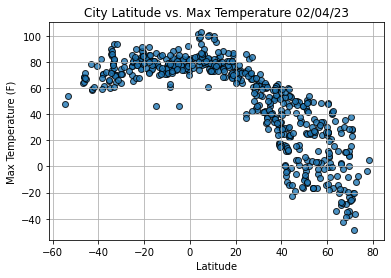

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig10.png")

# Show plot.
plt.show()

## Plot Latitude vs Humidity

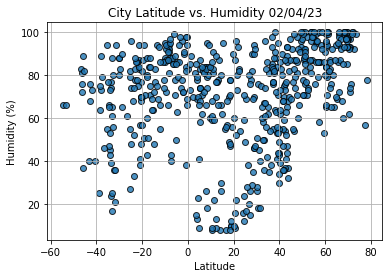

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig11.png")
# Show plot.
plt.show()

## Plot latitude vs cloudiness

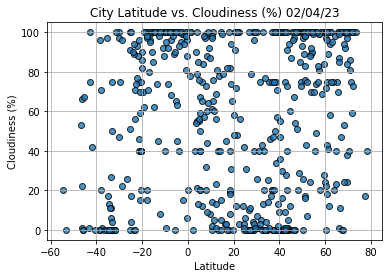

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig12.png")
# Show plot.
plt.show()

## Plot latitude vs windspeed

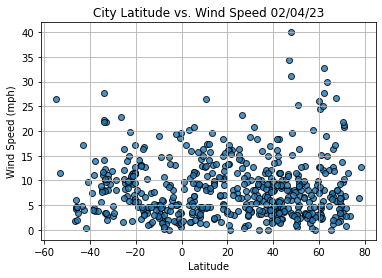

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig13.png")
# Show plot.
plt.show()

## Find the correlation between latitude ande maximum Temperature
Using the data from the Northern and Southern Hemispheres, we are going to perform linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.

We have an algorithm that performs the linear regression; returns the equation of the regression line, and correlation coefficient, and p value; and adds the regression line to a scatter plot of city weather data.

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sawakin,19.1059,37.3321,76.71,56,65,12.95,SD,2023-02-04 11:41:12
5,Qaanaaq,77.4840,-69.3632,-3.62,57,17,6.44,GL,2023-02-04 11:41:18
7,Challans,46.8436,-1.8749,50.20,74,0,8.14,FR,2023-02-04 11:38:19
8,Chokurdakh,70.6333,147.9167,-24.52,97,86,9.71,RU,2023-02-04 11:41:21
9,Lakewood,39.7047,-105.0814,43.14,44,100,1.99,US,2023-02-04 11:41:22


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

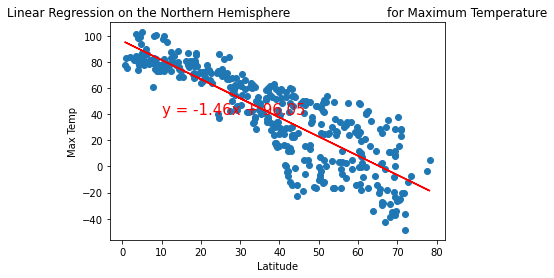

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

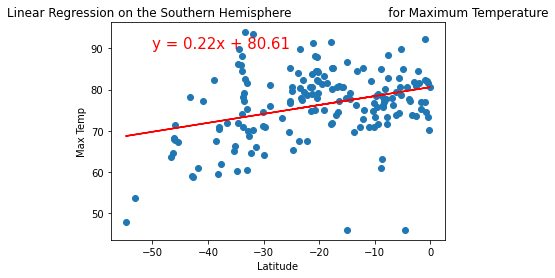

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

### Finding
The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler.  

## Find the Correlation Between Latitude and Percent Humidity

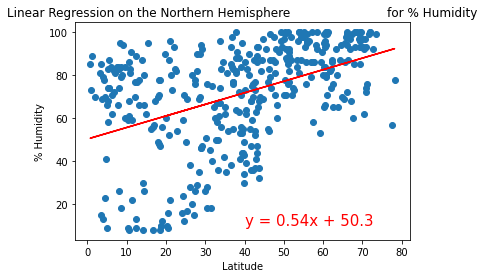

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

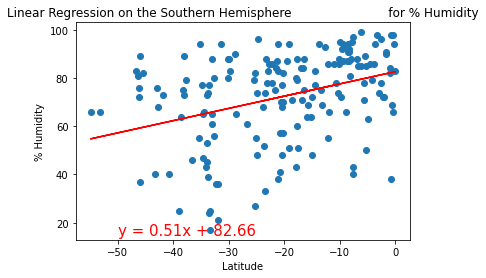

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

### FINDING
The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity.  

## Find the Correlation Between Latitude and Percent Cloudiness

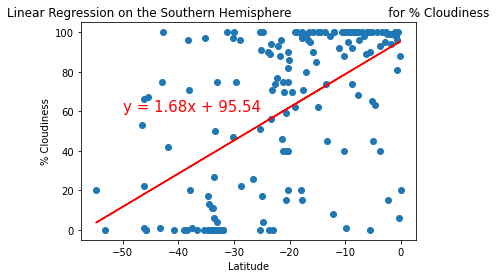

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

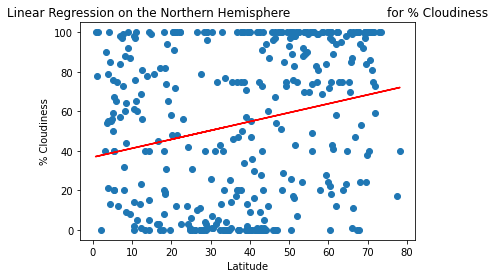

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

### FINDING
The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

## Find the Correlation Between Latitude and Wind Speed

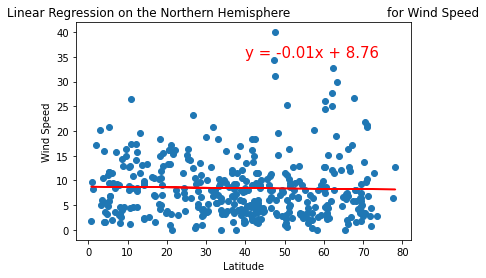

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

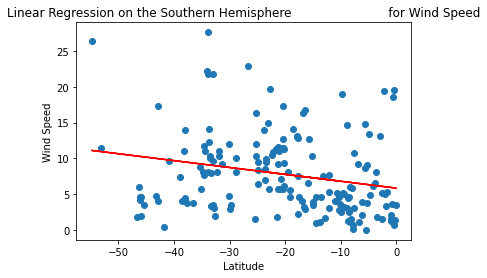

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

### FINDING
The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 